In [35]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer

In [34]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kun\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [10]:
df = pd.read_csv('Resume.csv' ,encoding='utf-8')
df['Cleaned_Resume'] = ''
df.head()

,ID,Resume_str,Resume_html,Category,Cleaned_Resume
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR,
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR,
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR,
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR,
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR,


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           2484 non-null   int64 
 1   Resume_str   2484 non-null   object
 2   Resume_html  2484 non-null   object
 3   Category     2484 non-null   object
dtypes: int64(1), object(3)
memory usage: 77.8+ KB


Text(0.5, 1.0, 'The number of records for each category')

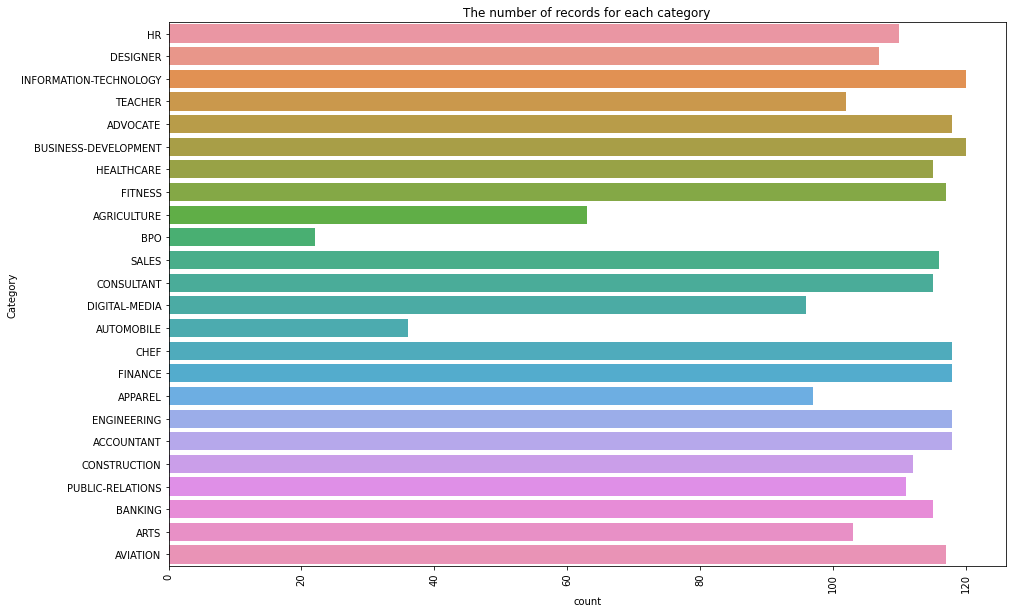

In [7]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.countplot(y="Category", data=df).set_title("The number of records for each category")

Preprocessing:

In this stage, I followed basic cleaning processes for text analysis which includes:

- converting characters to lowercases.
- remove punctuations, numbers and foreign languages.
- tokenize word. (spliting sentence into unigram)
- stemming word. (convert to inflected form of word which is usually a root form)

In [18]:
# def preprocess(txt):
#     # convert all characters in the string to lower case
#     txt = txt.lower()
#     # remove non-english characters, punctuation and numbers
#     txt = re.sub('[^a-zA-Z]', ' ', txt)
#     txt = re.sub('http\S+\s*', ' ', txt)  # remove URLs
#     txt = re.sub('RT|cc', ' ', txt)  # remove RT and cc
#     txt = re.sub('#\S+', '', txt)  # remove hashtags
#     txt = re.sub('@\S+', '  ', txt)  # remove mentions
#     txt = re.sub('\s+', ' ', txt)  # remove extra whitespace
#     # tokenize word
#     txt = nltk.tokenize.word_tokenize(txt)
#     # remove stop words
#     txt = [w for w in txt if not w in nltk.corpus.stopwords.words('english')]
#     # stemming

#     return ' '.join(txt)
    

In [19]:
# df['Resume_str'] = df['Resume_str'].apply(lambda w: preprocess(w))

In [36]:
# df[["Resume_str"]] = df[["Resume_str"]].lower()

In [31]:
def cleanResume(resumeText):
    resumeText = re.sub('httpS+s*', ' ', resumeText)  # remove all the URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^x00-x7f]',r' ', resumeText) 
    resumeText = re.sub('s+', ' ', resumeText)  # remove extra whitespace
    return resumeText
df['Cleaned_Resume'] = df.Resume_str.apply(lambda x: cleanResume(x))

In [39]:
df.head()

,ID,Resume_str,Resume_html,Category,Cleaned_Resume
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR,HR ADMINISTRATOR MARKETING ASSOCIATE ...
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR,HR SPECIALIST US HR OPERATIONS ...
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR,HR DIRECTOR Summar Over 2...
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR,HR SPECIALIST Summar Dedica...
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR,HR MANAGER Skill Highlight ...


In [43]:
df_onehot = pd.get_dummies(df, columns=["Category"], drop_first=True)
X, y = df_onehot["Cleaned_Resume"], df_onehot["Category"]


KeyError: 'Category'

In [44]:
from affinda import AffindaAPI, TokenCredential

token = "REPLACE_TOKEN"

credential = TokenCredential(token=token)
client = AffindaAPI(credential=credential)
all_resumes = client.get_all_resumes()

print(all_resumes.as_dict())

ServiceRequestError: <urllib3.connection.HTTPSConnection object at 0x000001FDA21AC3A0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed